# Compte Rendu TP3

## Ghdiri Oussama _ 4DS1

<br>

## Introduction

Le mouvement des Gilets jaunes est apparu en France en octobre 2018, ce mouvement social spontané trouve son origine dans la diffusion sur les réseaux sociaux d’appels à manifester.

La mobilisation a pour motivation de départ le rejet de l'augmentation de la taxe intérieure de consommation sur les produits énergétiques. Elle s'élargit rapidement à d’autres revendications fiscales et sociales ainsi que politiques.

## Explication du probleme

Nous nous intéressons dans ce travail à l’influence croisée de la science des données et des sciences sociales du politique.
En particulier, le mouvement social qu’à connu la France, qui ne cesse de prendre l’ampleur depuis la fin de 2018 et qui continue jusqu’au jour d’aujourd’hui est le mouvement des « Gilets Jaunes ».

## Presentation de la solution proposee

Analyse de sentiment, analyse de tonalité, opinion mining… Tous ces termes décrivent une technologie prévalente dans le monde de la veille et de l’analyse du web et des réseaux sociaux qui se base sur le traitement du langage naturel.

Alors nous allons analyser les tweets qui couvrent "le mouvement des gilets jaunes".

## Details techniques 

<br>

### Libraries 

In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import operator 
from collections import Counter
import re
from PIL import Image
from wordcloud import WordCloud
from nltk.classify import NaiveBayesClassifier
from nltk.classify import DecisionTreeClassifier
from nltk.classify import PositiveNaiveBayesClassifier
import nltk.classify.util
%matplotlib inline

## Data preparation

### Importing the dataset

In [419]:
gilet_jaune=pd.read_csv('giletjaune.csv',sep=',',decimal='.' ,quotechar='"' )
gilet_jaune.head(8)

,Date-Time,Twitter handle,Pleasure,Arousal,Tweet,sentiment
0,12-03-18 07:30,10thCrusader,5.64,4.64,"By the time Petit Macron gets back to Paris, h...",Neutral
1,12-01-18 18:46,AhmedTarekMokh1,6.52,4.30,RT @Keziadventure: Quick visit to the #ArcDeTr...,Positive
2,12-02-18 00:46,AlfArthur8,6.47,4.42,@GuyVerhoftwat Good time for @MayorofLondon to...,NaN
3,12-03-18 23:20,alicnsuna,5.24,5.52,RT @joepenney: #GiletJaune protestors beating ...,Negative
4,12-04-18 01:06,alown6666,5.60,4.14,@RusoAzul It was more like a contract between ...,Negative
5,12-03-18 07:53,andrew_ed_ba,5.83,3.86,"As part francophone, way to make the #GiletJau...",Negative
6,12-04-18 11:07,NaN,NaN,NaN,Viva la @EmmanuelMacron indeed.,Positive
7,12-04-18 02:54,Antibullshit12,5.07,4.54,RT @Antibullshit12: 1/3 The Battle For Paris! ...,Negative


In [420]:
final_data=pd.DataFrame(gilet_jaune.iloc[:,4:6])
final_data.head()

,Tweet,sentiment
0,"By the time Petit Macron gets back to Paris, h...",Neutral
1,RT @Keziadventure: Quick visit to the #ArcDeTr...,Positive
2,@GuyVerhoftwat Good time for @MayorofLondon to...,NaN
3,RT @joepenney: #GiletJaune protestors beating ...,Negative
4,@RusoAzul It was more like a contract between ...,Negative


In [421]:
data= final_data[(final_data.sentiment=='Positive') | (final_data.sentiment=='Negative')] 

In [422]:
data=data.reset_index(drop=True)
data.tail()

,Tweet,sentiment
32,One Dead Following Accident at 'Yellow Vest' R...,Negative
33,Instant #karma Justice immanente,Positive
34,"@KatieMcCoy101 all eyes on us, don't worry, we...",Positive
35,"RT @Sligogirls: #giletjaune """"Workers' no long...",Negative
36,RT @r_karahasanoglu: Where is the global media...,Positive


In [423]:
def clean_text(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(http\S+)|([0-9])", "", text).split())

In [445]:
mask=np.array(Image.open("france-vector-map.png"))

### Positive Tweets

In [424]:
pos_tweets= final_data[(final_data.sentiment=='Positive')]
pos_tweets=pos_tweets.reset_index(drop=True)
print("Positive tweets percentage: {} %".format(100*len(pos_tweets)/len(data))) 
pos_tweets.head()

Positive tweets percentage: 29.72972972972973 %


,Tweet,sentiment
0,RT @Keziadventure: Quick visit to the #ArcDeTr...,Positive
1,Viva la @EmmanuelMacron indeed.,Positive
2,"TODAY, A SYMBOL OF REPUBLIC & FREEDOM HAS BEEN...",Positive
3,Poweful stuff going on in France 😮 #GiletJaune,Positive
4,The point of the gilet jaune is to ensure its ...,Positive


### Cleaning the data

In [425]:
punctuation = list(string.punctuation)
pos_tweets['Tweet'] = pos_tweets['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
pos_tweets['Tweet'] = np.array(list(map(clean_text,pos_tweets['Tweet'])))
stop = stopwords.words('english') + punctuation+["rt","gilet","jaune","guy","giletjaune","giletsjaunes","paris","france","yellow","yellowvest","vest","de"]
count_all_pos = Counter()
all_pos_words=[]
for t in pos_tweets['Tweet'] :
    terms_all_pos = [term for term in  word_tokenize(t) if term not in stop]
    count_all_pos.update(terms_all_pos)
    
#print(count_all.most_common(10))
all_pos_words = ' '.join(count_all_pos)

### World cloud

(-0.5, 979.5, 923.5, -0.5)

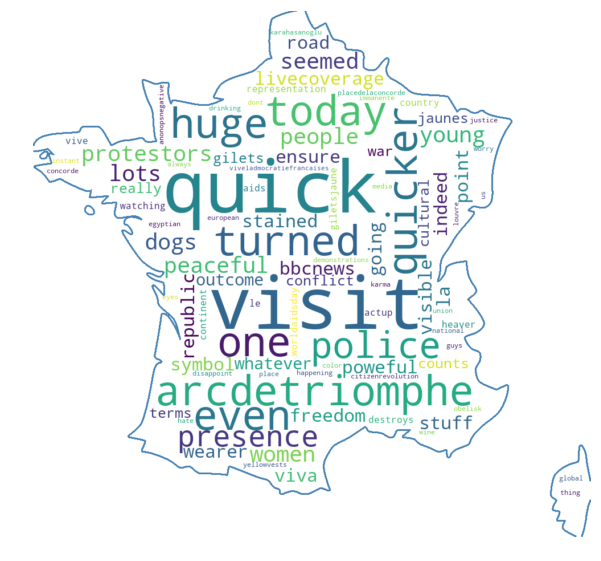

In [446]:
cloud = WordCloud(background_color="white", max_words=1000,stopwords=stop,
                contour_width=3, contour_color='steelblue', mask=mask)
cloud.generate(all_pos_words)
plt.figure(figsize=(10,10))
plt.imshow(cloud,interpolation='bilinear')
plt.axis("off")

### Negative Tweets

In [427]:
neg_tweets= final_data[ (final_data.sentiment=='Negative')]
neg_tweets=neg_tweets.reset_index(drop=True)
print("Negative tweets percentage: {} %".format(100*len(neg_tweets)/len(data)))
neg_tweets.head()

Negative tweets percentage: 70.27027027027027 %


,Tweet,sentiment
0,RT @joepenney: #GiletJaune protestors beating ...,Negative
1,@RusoAzul It was more like a contract between ...,Negative
2,"As part francophone, way to make the #GiletJau...",Negative
3,RT @Antibullshit12: 1/3 The Battle For Paris! ...,Negative
4,RT @Antibullshit12: 2/3 The Battle For Paris! ...,Negative


### Cleaning the data

In [428]:
punctuation = list(string.punctuation)
neg_tweets['Tweet'] = neg_tweets['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
neg_tweets['Tweet'] = np.array(list(map(clean_text,neg_tweets['Tweet'])))
stop = stopwords.words('english') + punctuation+["rt","gilet","jaune","guy","giletjaune","giletsjaunes","paris","france","yellow","yellowvest","vest","de"]
count_all_neg = Counter()
all_neg_words=[]
for t in neg_tweets['Tweet'] :
    terms_all_neg = [term for term in  word_tokenize(t) if term not in stop]
    count_all_neg.update(terms_all_neg)
    
#print(count_all.most_common(10))
all_neg_words = ' '.join(count_all_neg)

### World cloud

(-0.5, 979.5, 923.5, -0.5)

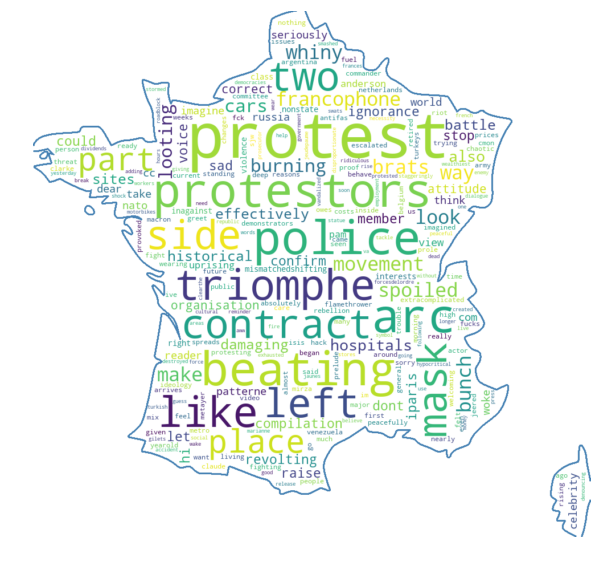

In [429]:
cloud = WordCloud(background_color="white", max_words=1000,stopwords=stop,
                contour_width=3, contour_color='steelblue', mask=mask)
cloud.generate(all_neg_words)
plt.figure(figsize=(10,10))
plt.imshow(cloud,interpolation='bilinear')
plt.axis("off")

### Feature extraction

In [430]:
def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words)
    return all_words


def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features


def read_tweets(data, t_type):
    tweets = []
    for t in data:
        tweets.append([t, t_type])
    return tweets


def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features


def classify_tweet(tweet):
    return \
        classifier.classify(extract_features(nltk.word_tokenize(tweet)))
def DTclassify_tweet(tweet):
    return \
        DTclassifier.classify(extract_features(nltk.word_tokenize(tweet)))


### Spliting the data: train and test

In [431]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(data, test_size=0.2, random_state=13)

In [432]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['Tweet']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['Tweet']

In [433]:
test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['Tweet']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['Tweet']

In [434]:
pos_tweet = read_tweets(train_pos,'Positive')
neg_tweet = read_tweets(train_neg, 'Negative')

In [435]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

In [436]:
word_features = get_word_features(\
                    get_words_in_tweets(tweets))

### Naive Bayes Classifier

In [437]:
training_set = nltk.classify.apply_features(extract_features, tweets)
classifier = NaiveBayesClassifier.train(training_set)

In [438]:
test_tweets = read_tweets(test_pos, 'Positive')
test_tweets.extend(read_tweets(test_neg, 'Negative'))
total  = float(len(test_tweets))

### Accuracy

In [439]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    
accuracy = total
for tweet in test_tweets:
    if classify_tweet(tweet[0]) != tweet[1]:
        accuracy -= 1
print('Total accuracy: %f%% .' % (accuracy / total * 100))

[Negative]: 3/3 
[Positive]: 5/0 
Total accuracy: 37.500000% .


### Decision Tree Classifier

In [440]:
DTclassifier = DecisionTreeClassifier.train(training_set)

### Accuracy

In [441]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  DTclassifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  DTclassifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    

DTaccuracy = total

for tweet in test_tweets:
    if DTclassify_tweet(tweet[0]) != tweet[1]:
        DTaccuracy -= 1
print('Total accuracy: %f%% .' % (DTaccuracy / total * 100))

[Negative]: 3/3 
[Positive]: 5/0 
Total accuracy: 37.500000% .


<br>

## Resultat et Interpretations 

- Nous avons analyse les sentiments des tweets entre positifs, negatifs et neutres
- Nous avons eliminer les tweets neutres car ils sont inutiles pour notre analyse
- Nous avons visualise les nuages des mots en eliminant les mots les plus utilisees comme France,Paris, gilets jaunes...
- Nous avons mesure les frequences des mots dans les tweets
- Nous avons utilise NaiveBayes pour classifier les tweets (positifs ou negatifs)
- L'accuracy de NaiveBayes est 37% 
- En untilisant le DescionTree l'accuracy est devenu 50%
- Ces mediocres resultats sont dus aux nombres limites des tweets (inferieur à 40 tweets) 
- Le classifieur donne un meilleur résultat pour les tweets négatifs que les positifs
- Les problèmes se posent lorsque les tweets sont ironiques, sarcastiques...
